In [ ]:
!pip install yfinance
!pip install git+https://github.com/dcajasn/Riskfolio-Lib.git
!pip install PyPortfolioOpt

#Faut changer notre version de numpy et pandas, pour l'avant dernière
!pip install Numpy==1.23.5
!pip install pandas==1.3.2



In [ ]:
run data.py

In [39]:
run tp3_sam.py

[*********************100%%**********************]  11 of 11 completed


## Time series of the Indexes and the ETFs

#### Time Series plot grid of the monthly historical returns of the ETF's benchmark Index 

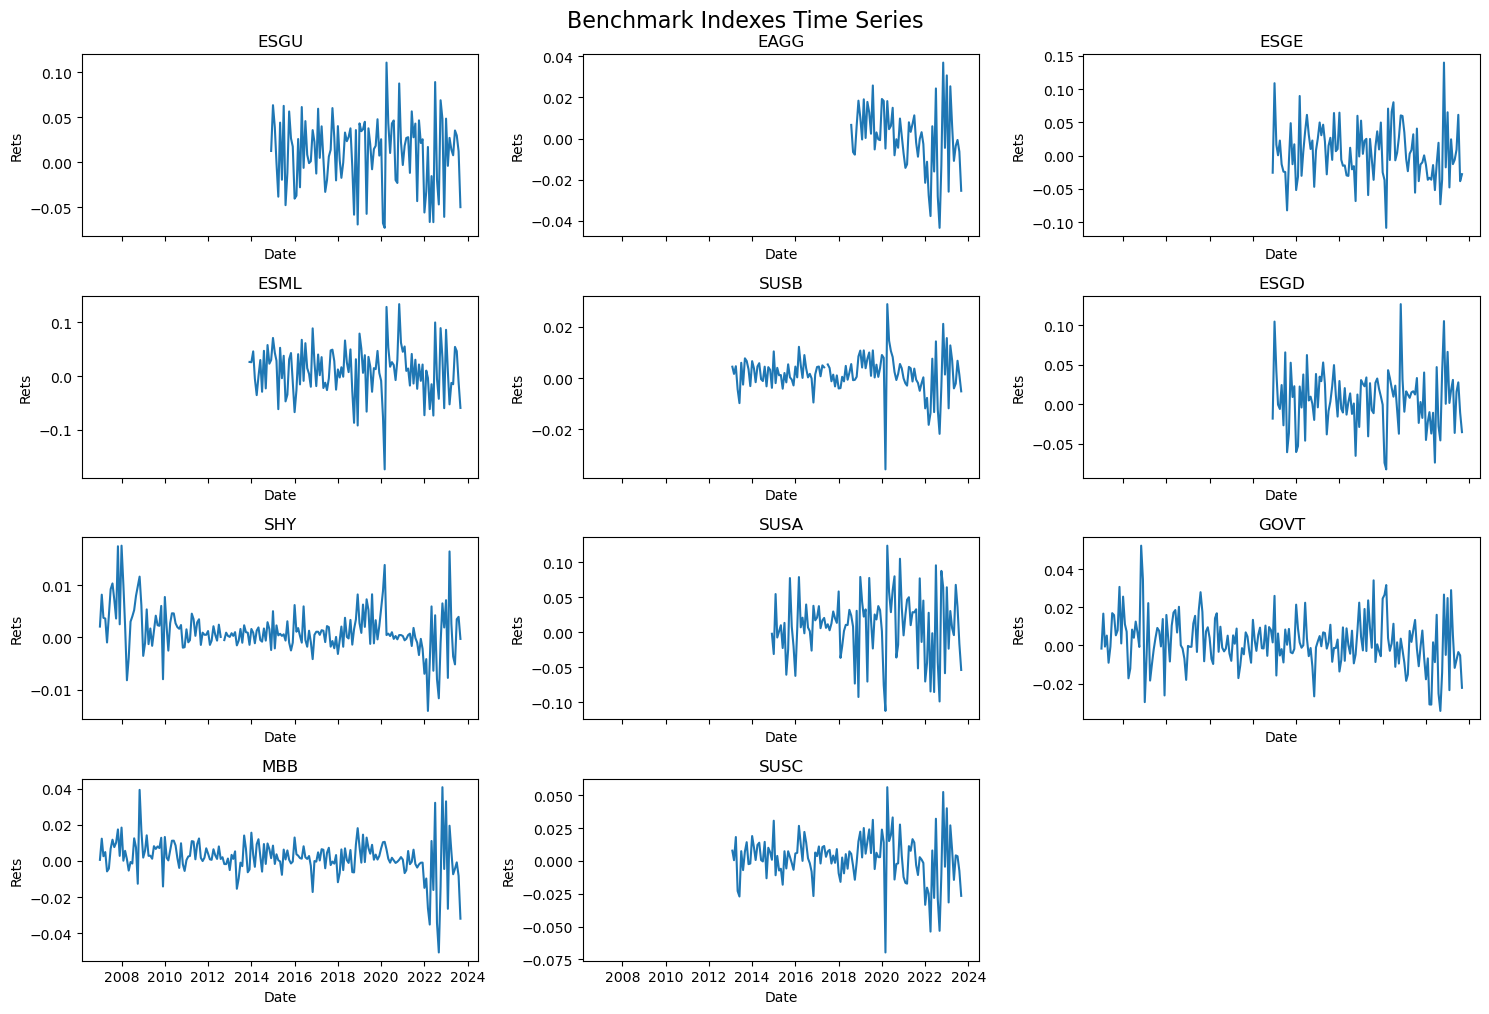

In [28]:
plot_time_series_grid(df_index_rets, title='Benchmark Indexes Time Series',  y_axis_label="Rets" )

#### Time Series plot grid of the ETF's historical monthly returns

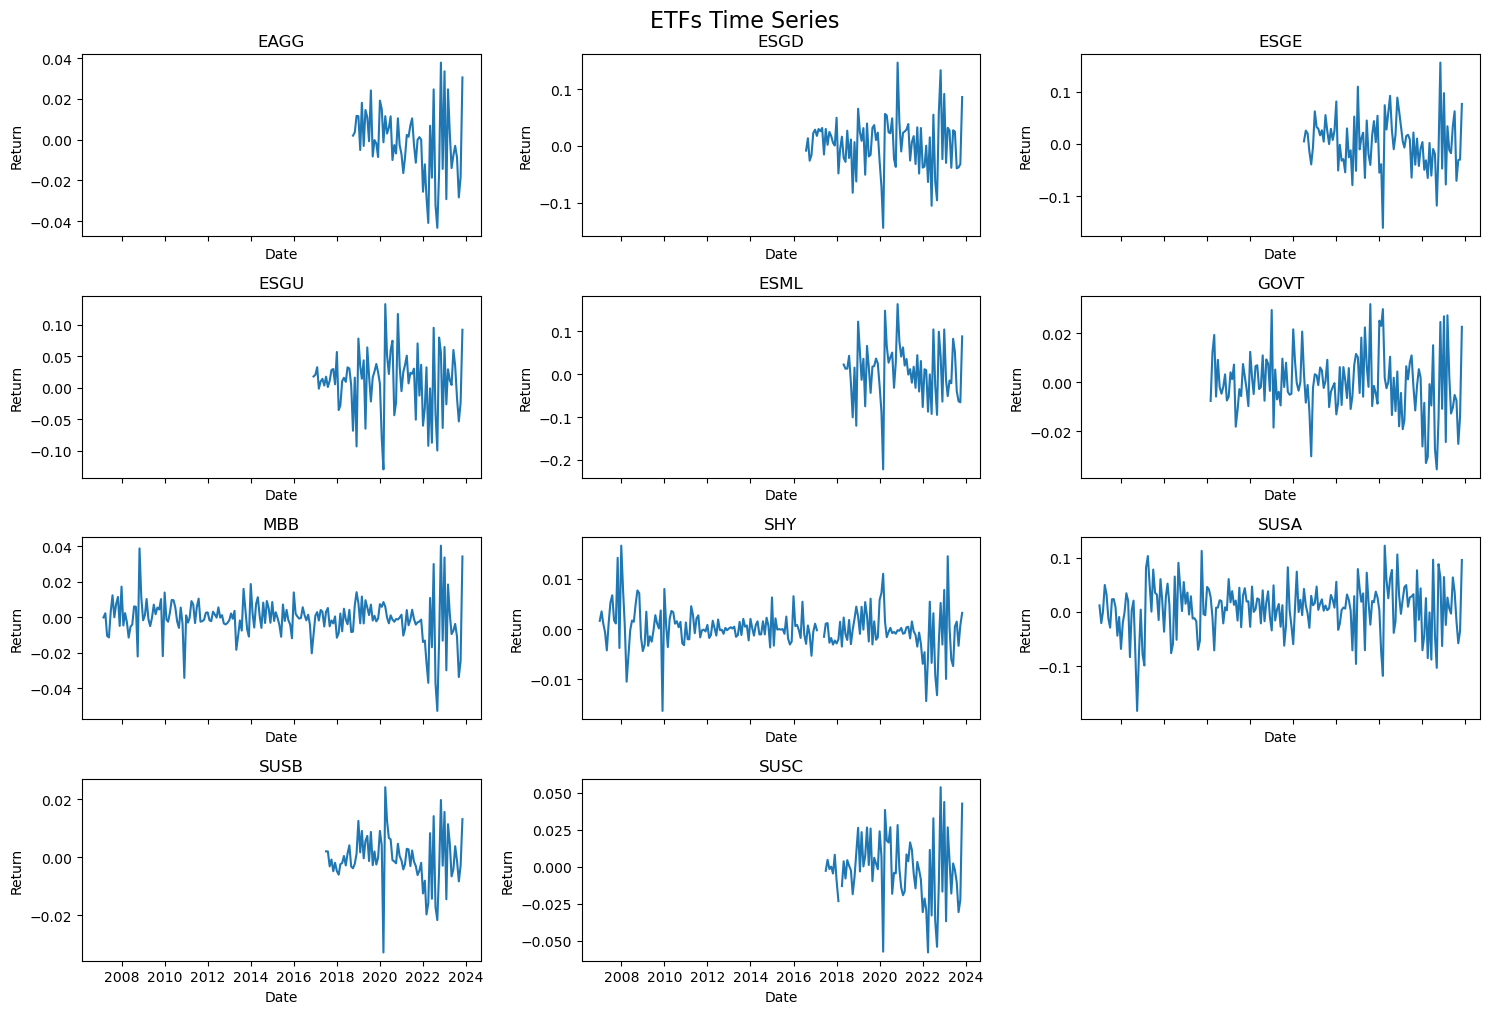

In [29]:
plot_time_series_grid(etf_monthly_rets,title='ETFs Time Series')

## Tracking error between ETF's and associated benchmark Index 

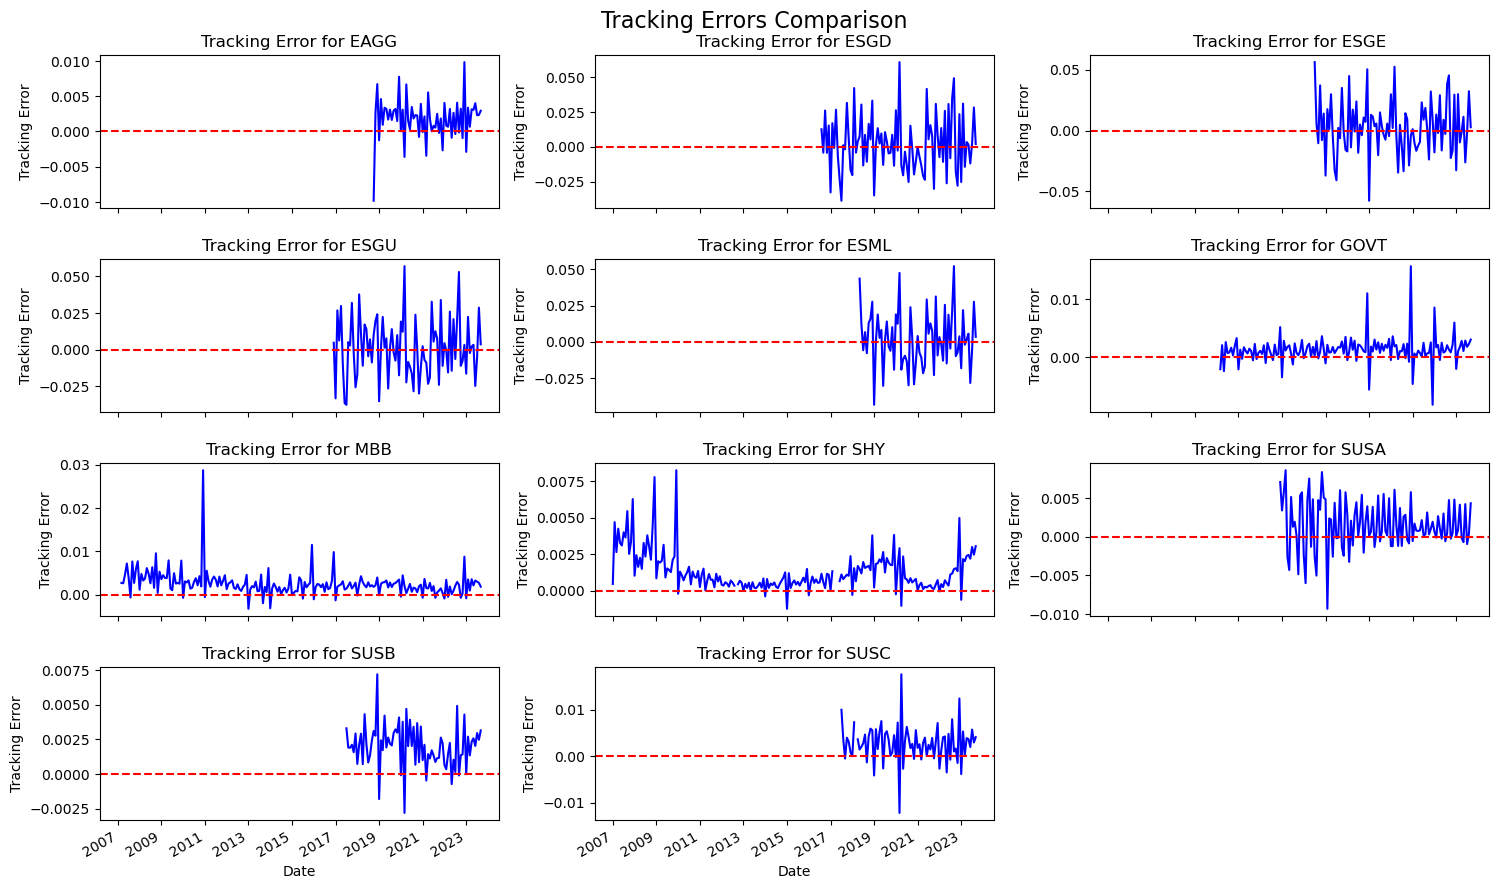

In [30]:
TE_fct(df_index_rets, etf_monthly_rets)

# Imputing data to index dataframe

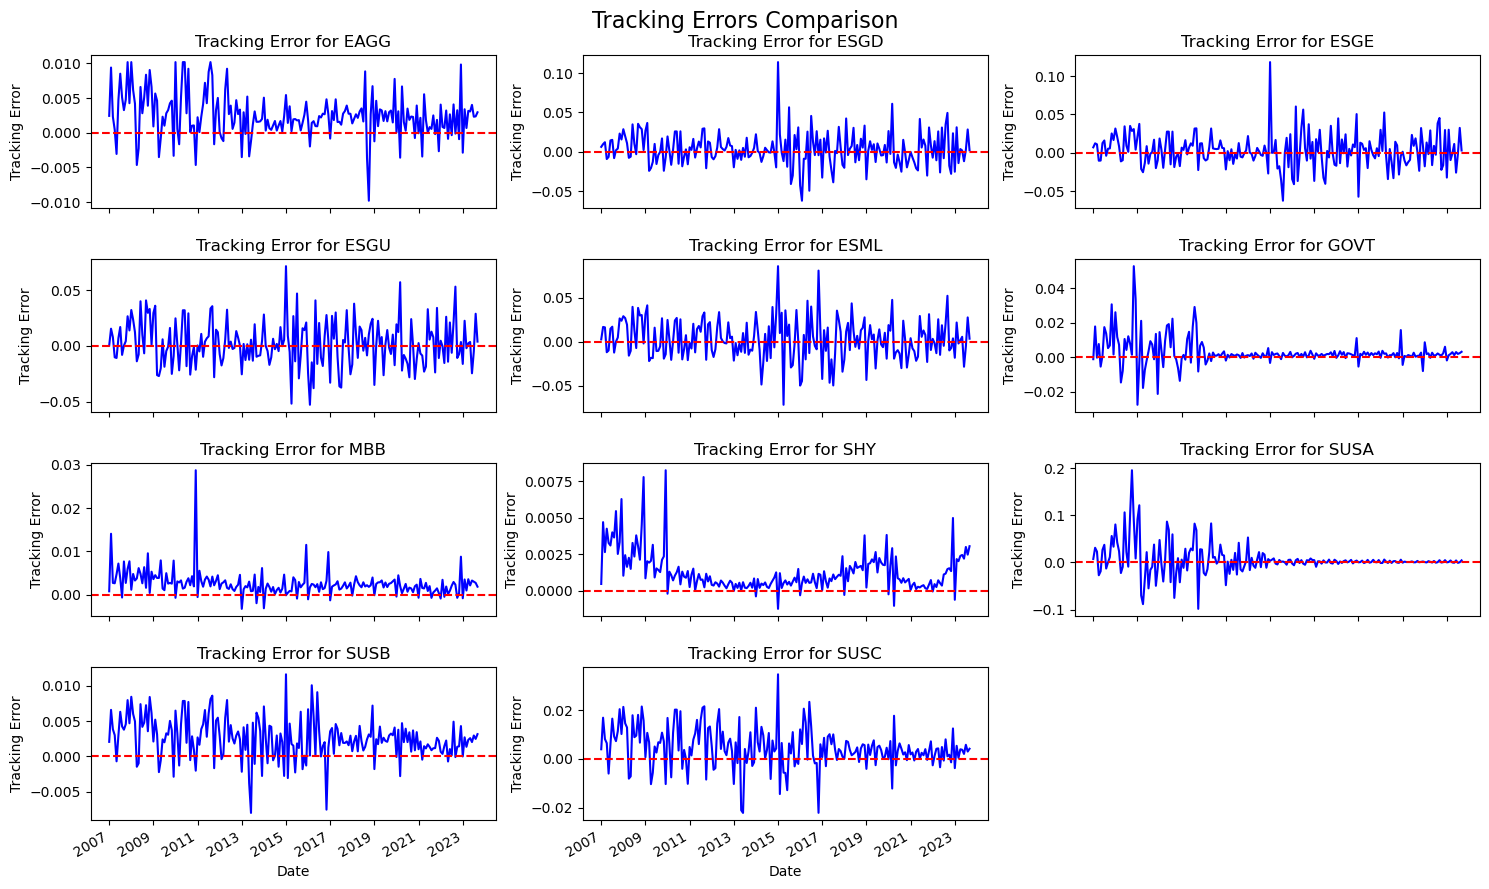

In [31]:
TE_fct(df_imputed_index, df_imputed_etf)

## Input Data Analysis 

#### correlation analysis of the historical monthly returns of the ETF's benchmark index 

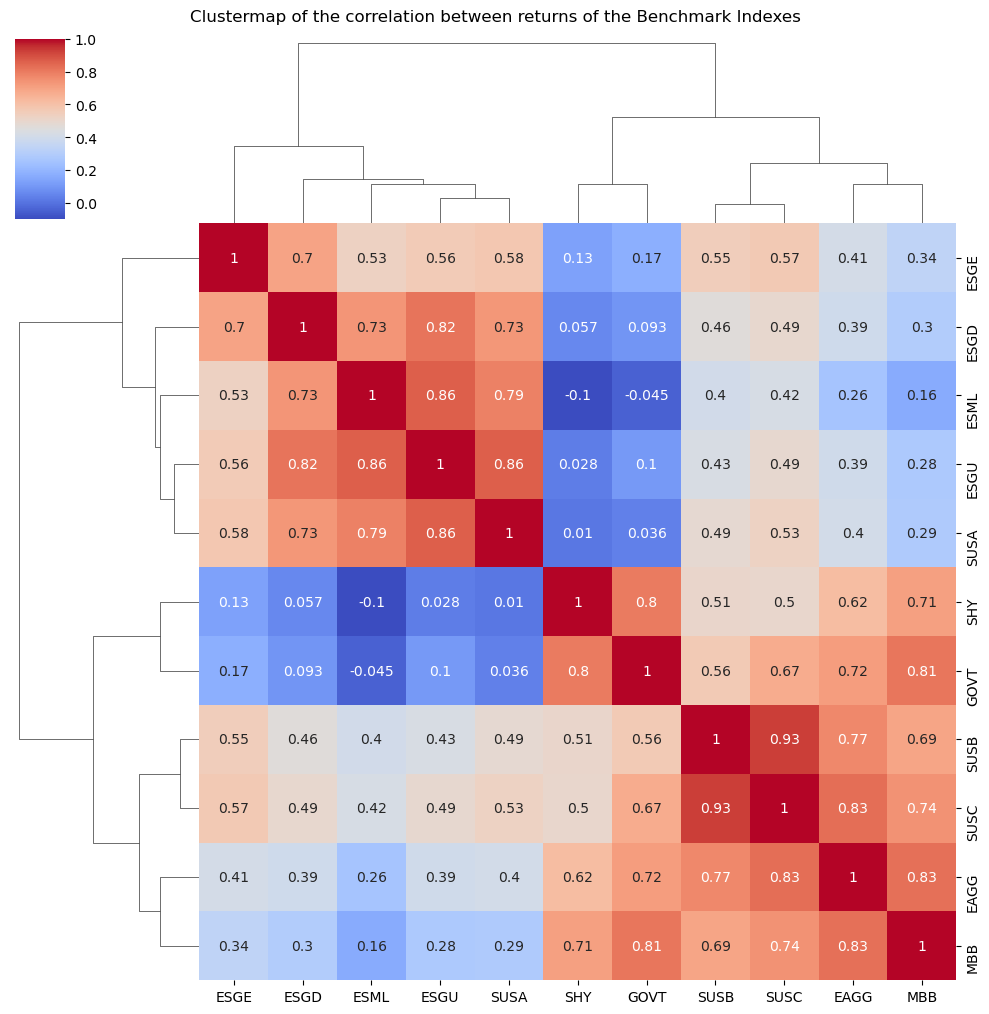

In [32]:
# Clustermap of correlation of benchmark indexes returns
imputed_index_corr = pd.DataFrame(df_imputed_index).corr()
sns.clustermap(imputed_index_corr, annot=True, square=True, cmap='coolwarm')
plt.suptitle('Clustermap of the correlation between returns of the Benchmark Indexes').set_y(1.01)

plt.show();

#### histograms of the Indexes monthly returns 


ESGU
count    201.000000
mean       0.013209
std        0.028304
min       -0.072736
25%        0.007897
50%        0.014849
75%        0.025556
max        0.110611
Name: ESGU, dtype: float64
Average spread of the benchmark index: 0.18334701034632206
Skewness of the benchmark index: -0.6192153031332859 
Kurtosis of the benchmark index: 1.9894551928943542 

EAGG
count    201.000000
mean       0.001052
std        0.009063
min       -0.043401
25%       -0.000672
50%        0.001289
75%        0.003997
max        0.036925
Name: EAGG, dtype: float64
Average spread of the benchmark index: 0.08032620818975811
Skewness of the benchmark index: -0.7411116393725645 
Kurtosis of the benchmark index: 6.841281358129493 

ESGE
count    201.000000
mean       0.007242
std        0.030440
min       -0.108789
25%       -0.004808
50%        0.009975
75%        0.016414
max        0.140001
Name: ESGE, dtype: float64
Average spread of the benchmark index: 0.24878990676898827
Skewness of the benchmark index:

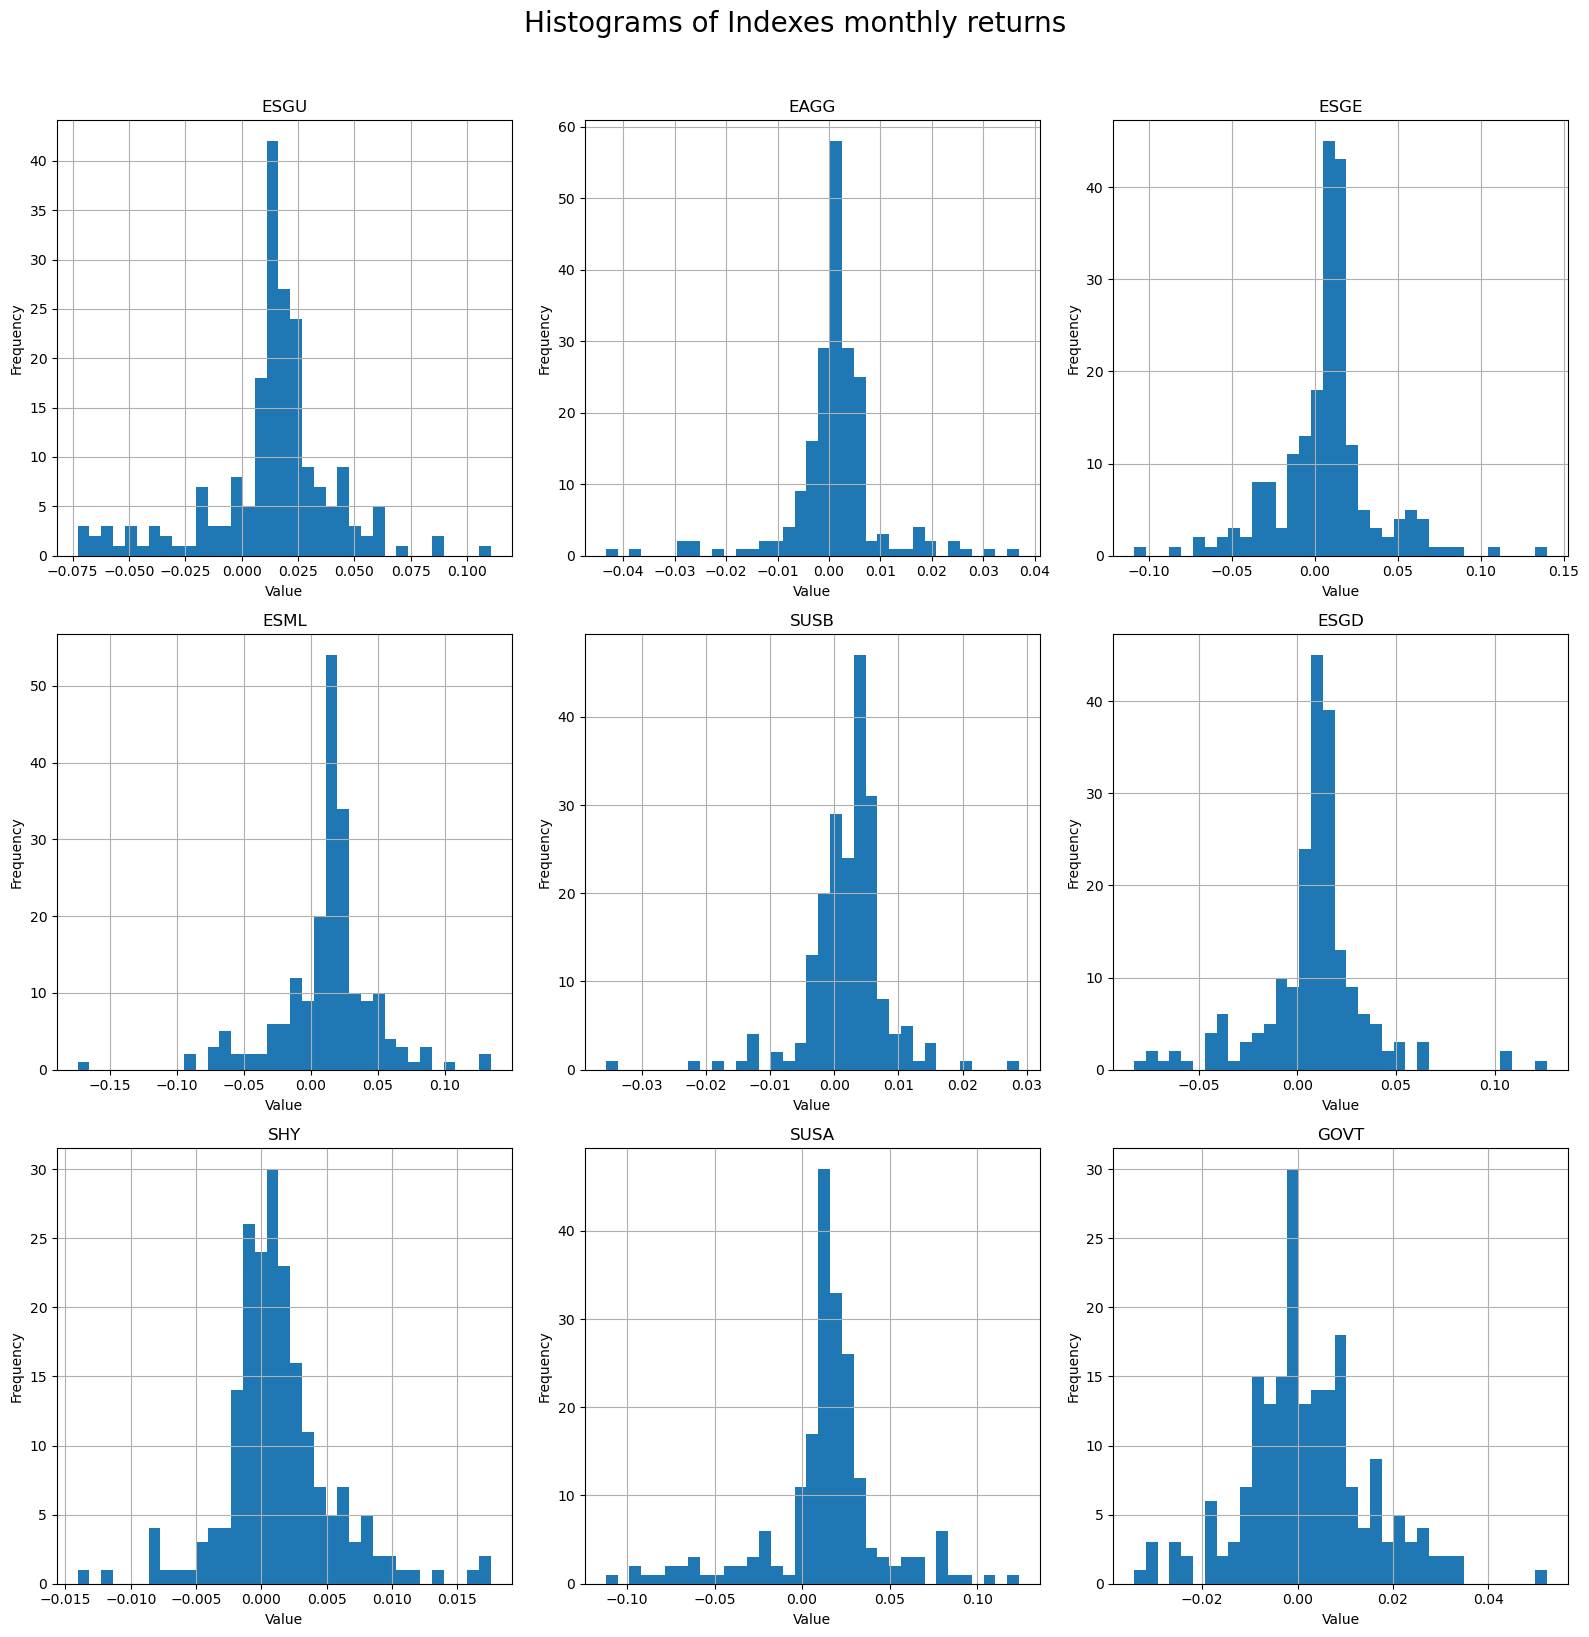

In [33]:

# Get the list of all column names
columns = df_imputed_index.columns

# Determine the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a figure and subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 16))
fig.suptitle("Histograms of Indexes monthly returns", fontsize=20).set_y(1.02)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Loop through the columns and plot histograms
for i, column in enumerate(columns):
    if i >= num_rows * num_cols:
        break  # Exit the loop if you exceed the number of subplots
    
    ax = axs[i]
    df_imputed_index[column].hist(ax=ax, bins=35)  # You can adjust the number of bins as needed
    ax.set_title(column)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    print(f'\033[1m{column}\033[0m')
    print(df_imputed_index[column].describe())
    print(f'Average spread of the benchmark index: {np.mean(df_imputed_index[column].max()-df_imputed_index[column].min())}')
    print(f'Skewness of the benchmark index: {np.mean(skew(df_imputed_index[column][:], nan_policy="omit"))} ')
    print(f'Kurtosis of the benchmark index: {np.mean(kurtosis(df_imputed_index[column][:], nan_policy="omit"))} ')
    print('', sep='\n')

    # Hide any empty subplots if there are more subplots than columns
    for i in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[i])

# Adjust layout
plt.tight_layout()
plt.show()



## Machine learning methods to predict next month return
* Random Forest 
* Regression Tree

#### Features historical values analysis 

**Bonds**
 
- **BAMLCC0A0CMTRIV**: ICE BofA US Corporate Index Total Return Index Value <br>
- **BAMLC0A4CBBB**: ICE BofA BBB US Corporate Index Option-Adjusted Spread  <br>
- **BAMLC0A3CA**: ICE BofA Single-A US Corporate Index Option-Adjusted Spread  <br>
- **HQMCB10YR**: 10-Year High Quality Market (HQM) Corporate Bond Spot Rate <br>
- **FEDFUNDS**: Federal Funds Effective Rate <br>
- **T10Y2Y**: 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity <br>
- **TB3SMFFM**: 3-Month Treasury Bill Minus Federal Funds Rate <br>
- **T5YFF**: 5-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **T1YFF**: 1-Year Treasury Constant Maturity Minus Federal Funds Rate <br>
- **DLTIIT**: Treasury Long-Term Average (Over 10 Years), Inflation-Indexed <br>


**Equity Indexes**
- **NASDAQCOM**: NASDAQ Composite Index<br>
- **WILL5000PR**: Wilshire 5000 Price Index<br>
- **WILLLRGCAP**: Wilshire US Large-Cap Total Market<br>
- **WILLSMLCAP**: Wilshire US Small-Cap Total Market Index<br>
- **WILLLRGCAPGR**: Wilshire US Large-Cap Growth Total Market Index<br>
- **WILLLRGCAPVAL**: Wilshire US Large-Cap Value Total Market Index<br>
- **WILLMIDCAP**: Wilshire US Mid-Cap Total Market Index<br>
- **SBPREUE**: S&P Europe LargeMidCap <br>
- **MXEUMC**: MSCI Europe Mid Cap Index (USD)<br>
- **MXEULC**: MSCI Europe Large Cap Index (USD)<br>
- **SPAXLCUP**: S&P Pan Asia Ex-JP, AU, NZ, IN LargeCap Index<br>
- **SBPRAPU**: S&P Asia Pacific LargeMidCap<br>
- **MEMMG**: Morningstar Emerging Markets<br>
- **MXEF**: MSCI Emerging Markets Index<br>
- **MXEFLC**: MSCI Emerging Markets Large Cap Index (USD)<br>
- **MXEFMC**: MSCI Emerging Markets Mid Cap Index (USD)<br>
- **SML**: S&P SmallCap 600<br>


**Other**
- **MSPUS**: Median Sales Price of Houses Sold for the United States <br>
- **CCSA**: Continued Claims (Insured Unemployment) <br>
- **BOPGSTB**: Trade Balance: Goods and Services, Balance of Payments Basis<br>
- **VIXCLS**: CBOE Volatility Index: VIX<br>
- **USSLIND**: Leading Index for the United States<br>
- **USALOLITONOSTSAM**: Leading Indicators OECD: Leading Indicators: Composite Leading Indicator: Normalised for United States<br>
- **UNRATE**: Unemployment Rate<br>
- **STICKCPIM157SFRBATL**: Sticky Price Consumer Price Index less Food and Energy       <br>
- **EMVMACROBUS**: Equity Market Volatility Tracker: Macroeconomic News and Outlook: Business Investment And Sentiment<br>
- **MORTGAGE30US**: 30-Year Fixed Rate Mortgage Average in the United States<br>
- **WILLRESIPR**: Wilshire US Real Estate Securities Price Index (Wilshire US RESI)<br>



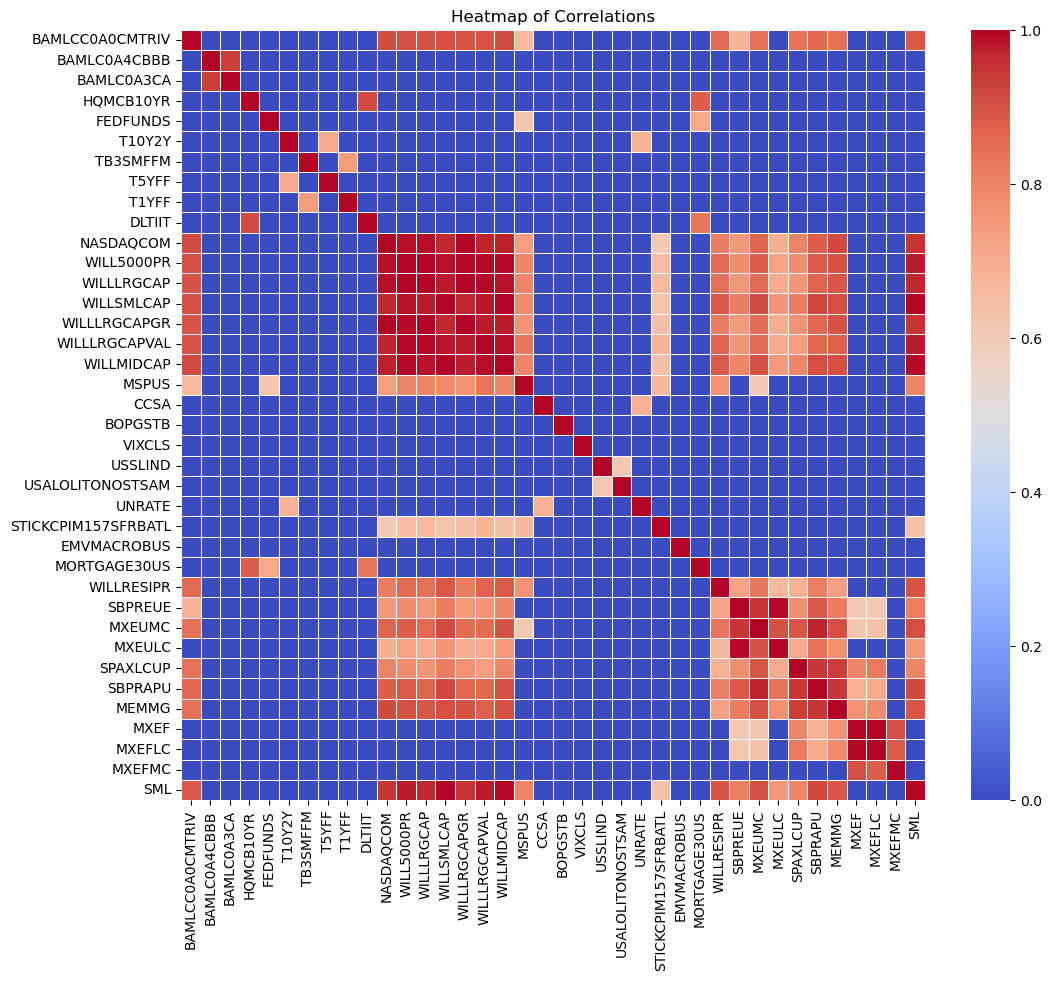

In [34]:
# Set a threshold for correlation
x_corr = pd.DataFrame(x).corr()
threshold = 0.6
x_corr[x_corr < threshold] = 0

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(x_corr, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlations')
plt.show()

We can notice some strong correlations levels are observable among the historical features values. This makes sense since we do expect indeed that interest rate measure move together. This is also true for total market equity indexes used such as S&P500, Wilshire 1000, Wildshire total market, etc.  The following table describe the feature associated with the tick presented in the clustermap. 

## Random Forest

* fold 1 : training [1], test [2]
* fold 2 : training [1 2], test [3]
* fold 3 : training [1 2 3], test [4]
* fold 4 : training [1 2 3 4], test [5]
* fold 5 : training [1 2 3 4 5], test [6]


https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection

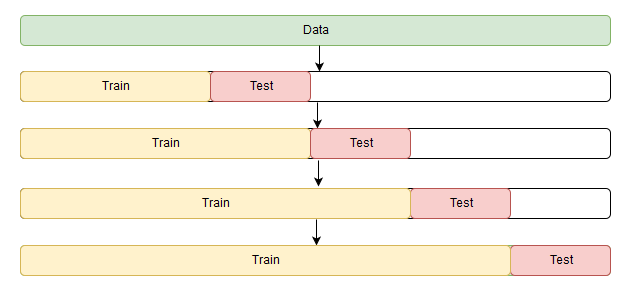

Average Mean Absolute Error using 5-fold cross-validation - Random Forest

Average Mean Absolute Error for ESGU: 0.02414197296634682
Average Mean Absolute Error for EAGG: 0.005740001516696976
Average Mean Absolute Error for ESGE: 0.023632522278565195
Average Mean Absolute Error for ESML: 0.02809677816159331
Average Mean Absolute Error for SUSB: 0.004560690274866889
Average Mean Absolute Error for ESGD: 0.020947368639904686
Average Mean Absolute Error for SHY: 0.0023715672923930132
Average Mean Absolute Error for SUSA: 0.025998320559293263
Average Mean Absolute Error for GOVT: 0.010107185514447132
Average Mean Absolute Error for MBB: 0.006381799967537484
Average Mean Absolute Error for SUSC: 0.011739284712925195


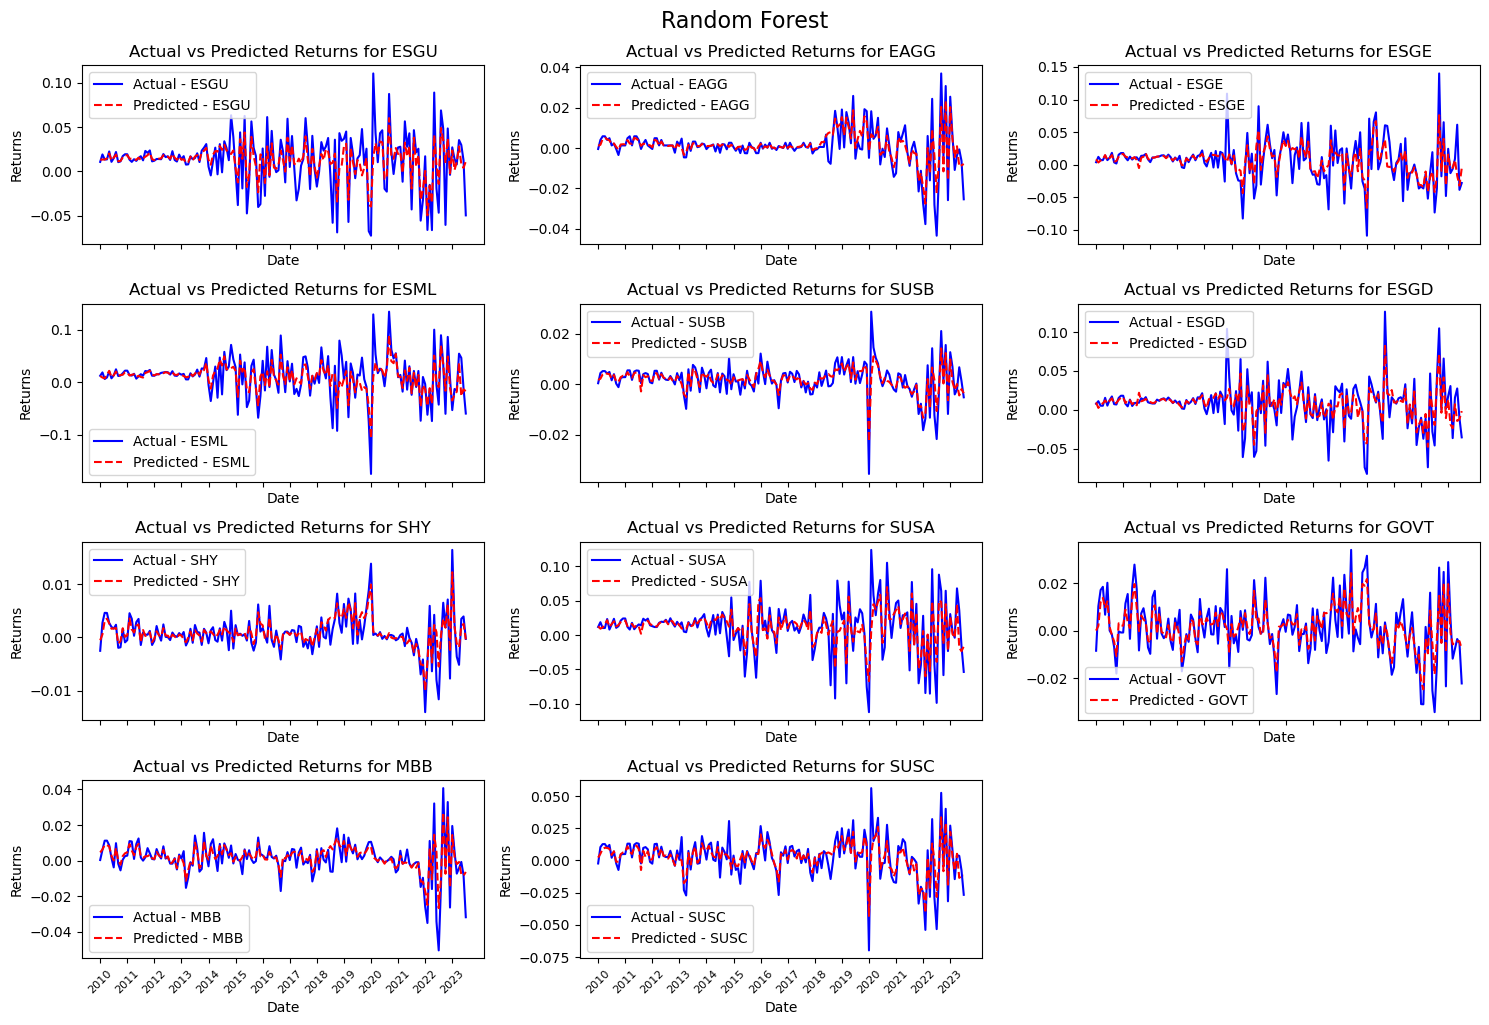

In [47]:
# Number of folds for cross-validation
num_folds = 5

# Create a grid for subplots
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()
years = time_serie_plot.str[:4]

print(f'Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRandom Forest\033[0m')
print('', sep='/n')

# Iterate over each index
for i, ticker in enumerate(ticker_list):
    # Extract features and target variable for the current stock
    x = merged_df[features_list]
    y = merged_df[ticker]
    
    # Standardize features
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    
    # K-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    
    # Initialize model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Lists to store evaluation metrics
    mae_list = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list = []
    predicted_returns_list = []
    
    # Iterate over folds
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Model Training
        rf_model.fit(X_train, y_train)
        
        # Model Prediction
        y_pred = rf_model.predict(X_test)
        
        # Evaluate Model Performance
        mae = mean_absolute_error(y_test, y_pred)
        mae_list.append(mae)
        
        # Store actual and predicted returns for plotting
        actual_returns_list.extend(y_test)
        predicted_returns_list.extend(y_pred)
    
    # Calculate average MAE across folds for the current stock
    average_mae = sum(mae_list) / len(mae_list)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae}')
    
    # Predict returns for the entire period
    predicted_returns = rf_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame
    predicted_returns_df[ticker] = predicted_returns

    # Plot the actual and predicted time series only if there is data
    if not y.empty:
        ax = axes[i]
        ax.plot(time_serie_plot, y, label=f'Actual - {ticker}', color='blue')
        ax.plot(time_serie_plot, predicted_returns, label=f'Predicted - {ticker}', linestyle='--', color='red')
        ax.set_title(f'Actual vs Predicted Returns for {ticker}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.legend()

        # Adjust x-axis labels
        ax.set_xticks(time_serie_plot[::12])  # Set x-axis ticks every 24 months
        ax.set_xticklabels(years[::12], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
fig.suptitle('Random Forest', fontsize=16).set_y(1.02)  # Adjust the y parameter for subtitle placement
plt.show()

## Regression Tree

Average Mean Absolute Error using {num_folds}-fold cross-validation - Regression Tree

Average Mean Absolute Error for ESGU: 0.030741025102059227
Average Mean Absolute Error for EAGG: 0.007293750247646486
Average Mean Absolute Error for ESGE: 0.0311536162150911
Average Mean Absolute Error for ESML: 0.035217014788675345
Average Mean Absolute Error for SUSB: 0.0062369671158233496
Average Mean Absolute Error for ESGD: 0.027003764573796562
Average Mean Absolute Error for SHY: 0.0034226219862993
Average Mean Absolute Error for SUSA: 0.03432622597467612
Average Mean Absolute Error for GOVT: 0.0133150214146711
Average Mean Absolute Error for MBB: 0.008532570736403153
Average Mean Absolute Error for SUSC: 0.015100088041304813


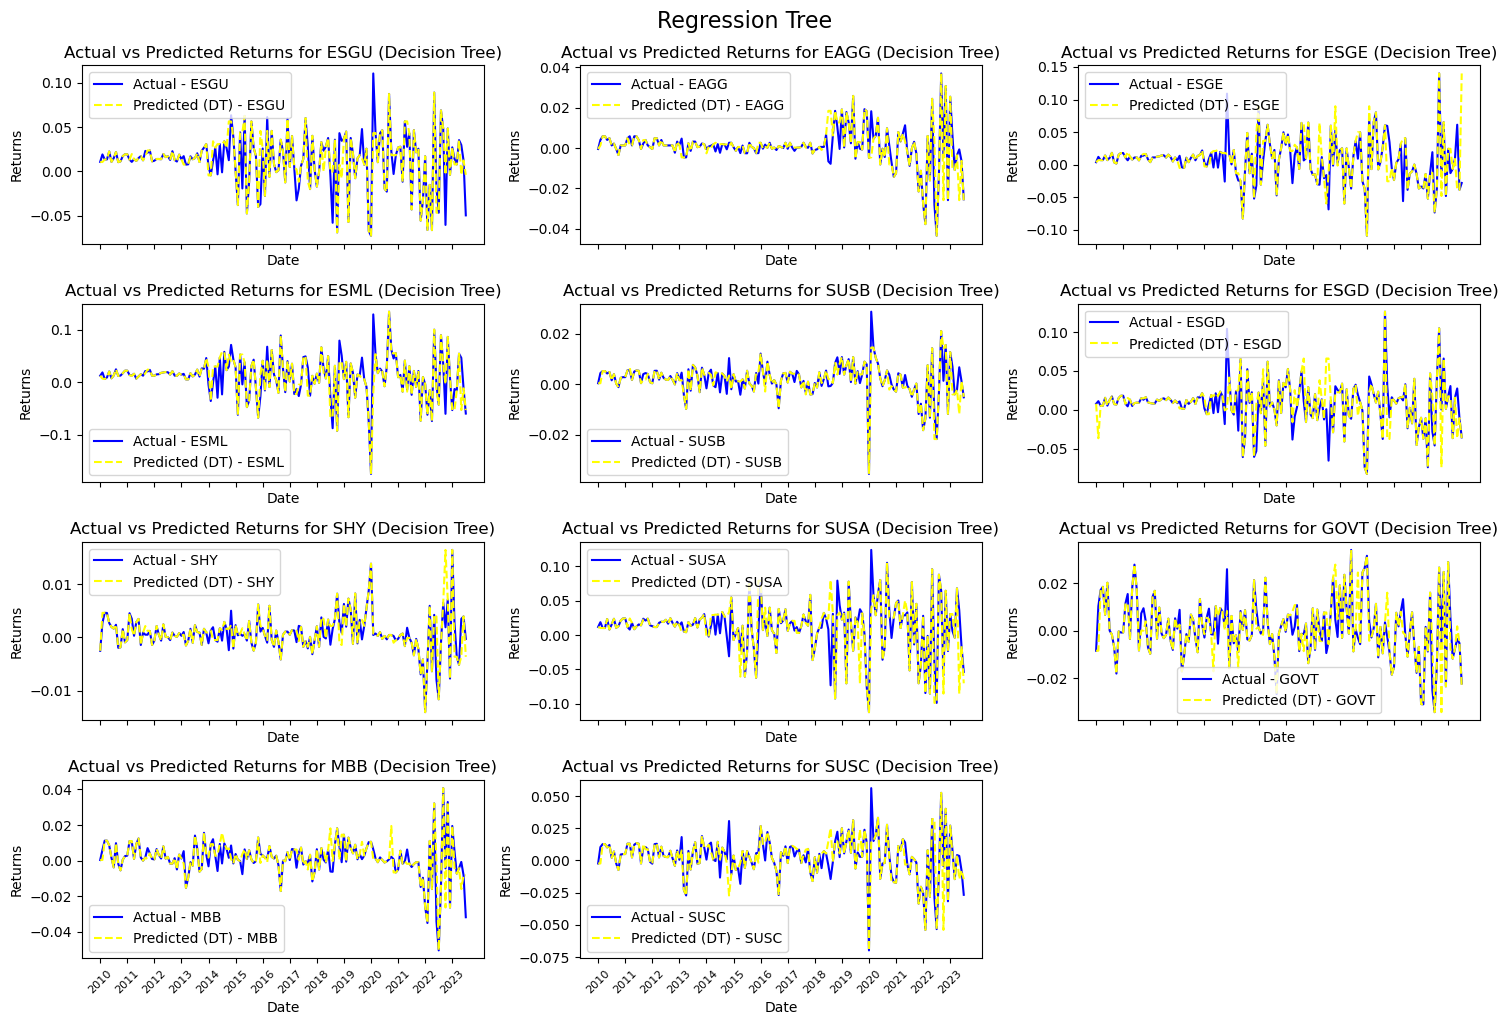

In [44]:
# Create a 4x3 grid for subplots for Decision Tree
fig_dt, axes_dt = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10), sharex=True)
axes_dt = axes_dt.flatten()
print('Average Mean Absolute Error using {num_folds}-fold cross-validation - \033[1mRegression Tree\033[0m')
print('', sep='/n')

for i, ticker in enumerate(ticker_list):
    # Initialize Decision Tree model
    dt_model = DecisionTreeRegressor(random_state=42)
    
    # Lists to store evaluation metrics
    mae_list_dt = []
    
    # Lists to store actual and predicted returns for plotting
    actual_returns_list_dt = []
    predicted_returns_list_dt = []
    
    # K-fold cross-validation for Decision Tree
    for train_index, test_index in kf.split(x_scaled):
        X_train, X_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = merged_df[ticker].iloc[train_index], merged_df[ticker].iloc[test_index]
        
        # Model Training for Decision Tree
        dt_model.fit(X_train, y_train)
        
        # Model Prediction for Decision Tree
        y_pred_dt = dt_model.predict(X_test)
        
        # Evaluate Model Performance
        mae_dt = mean_absolute_error(y_test, y_pred_dt)
        mae_list_dt.append(mae_dt)
        
        # Store actual and predicted returns for Decision Tree
        actual_returns_list_dt.extend(y_test)
        predicted_returns_list_dt.extend(y_pred_dt)
    
    # Calculate average MAE across folds for the current stock
    average_mae_dt = sum(mae_list_dt) / len(mae_list_dt)
    print(f'Average Mean Absolute Error for {ticker}: {average_mae_dt}')
    
    # Predict returns for the entire period using Decision Tree
    predicted_returns_dt = dt_model.predict(x_scaled)
    
    # Store predicted returns in the DataFrame for Decision Tree
    predicted_returns_df_dt[ticker] = predicted_returns_dt
    
    # Plot the actual and predicted time series for Decision Tree
    ax = axes_dt[i]
    ax.plot(time_serie_plot, merged_df[ticker], label=f'Actual - {ticker}', color='blue')
    ax.plot(time_serie_plot, predicted_returns_dt, label=f'Predicted (DT) - {ticker}', linestyle='--', color='yellow')
    ax.set_title(f'Actual vs Predicted Returns for {ticker} (Decision Tree)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Returns')
    ax.legend()

    # Adjust x-axis labels
    ax.set_xticks(time_serie_plot[::12])  # Set x-axis ticks every 24 months
    ax.set_xticklabels(years[::12], rotation=45, fontsize=8)  # Set x-axis labels with every second year, rotated for better visibility

# Hide empty subplots if the number of subplots is less than the total number of subplots in the grid
for j in range(i + 1, len(axes_dt)):
    axes_dt[j].axis('off')

# Adjust layout for Decision Tree
plt.tight_layout()
fig_dt.suptitle('Regression Tree', fontsize=16).set_y(1.02)  # Adjust the y parameter for subtitle placement
plt.show()

## Monthly returns predictions 

The following Dataframes containt the monthly return predictions made by the respective machine learning method based on the previous month feature values. 

In [37]:
# Random forest predicted Monthly returns for each Index (ETF): 
predicted_returns_df

,ESGU,EAGG,ESGE,ESML,SUSB,ESGD,SHY,SUSA,GOVT,MBB,SUSC
2010-03,0.013199,0.001149,0.008273,0.011954,0.001685,0.009461,-0.000548,0.012762,0.000110,0.004577,0.002239
2010-04,0.013329,0.001583,0.003434,0.008941,0.002182,0.002414,0.000570,0.009319,0.002112,0.006237,0.005218
2010-05,0.013294,0.004500,0.006507,0.007426,0.003899,0.006673,0.003156,0.011119,0.012105,0.008741,0.009064
2010-06,0.014695,0.004983,0.008352,0.014692,0.004440,0.008326,0.003537,0.016006,0.013881,0.008680,0.009882
2010-07,0.020171,0.004407,0.014809,0.021706,0.004197,0.011959,0.002630,0.021540,0.009636,0.008003,0.009766
...,...,...,...,...,...,...,...,...,...,...,...
2023-05,0.010505,-0.004455,-0.004479,-0.017993,-0.002280,-0.023833,-0.001201,-0.003590,-0.005725,-0.001969,-0.007812
2023-06,0.028086,0.000878,0.007132,0.037253,0.000067,0.007171,-0.001850,0.044967,-0.004660,-0.000791,0.005190
2023-07,0.008419,-0.009060,-0.016789,-0.026305,-0.004455,-0.014379,0.002026,-0.018352,-0.004449,-0.007631,-0.013478
2023-08,0.003922,-0.008571,-0.031909,-0.013423,-0.001958,-0.012123,0.002554,-0.023406,-0.004365,-0.008503,-0.011929


In [38]:
monthly_rf

,GS1M
DATE,
2001-07,0.0367
2001-08,0.0353
2001-09,0.0268
2001-10,0.0227
2001-11,0.0199
...,...
2023-06,0.0520
2023-07,0.0539
2023-08,0.0554


## Historical Monthly returns 

In [ ]:
# Filled Index monthly returns used as proxy of the ETF 
df_imputed_index

In [ ]:
# Actual monthly hoistorical returns of the ETFs
etf_monthly_rets

# Remi's 

In [ ]:
rets

In [ ]:
#Annualized variance of returns
np.sqrt(rets.var()*252)

## Risk parity relaxed optim based on historical rets and cov

Build the linear constraint based on the ESG rating

In [ ]:
import pandas as pd
from riskfolio import factors_constraints

# Your DataFrame
ESG_constraint_data = {
    'ESG Fund Rating': [6.6, 8.6, 7.1, 7.3, 6.5, 5.7, 6, 5.7, 8.2, 7.9, 7.6],
}

ESG_constraint = pd.DataFrame(ESG_constraint_data)

# Define the constraints based on your DataFrame
constraints = pd.DataFrame({
    'Disabled': [False],
    'Factor': ['ESG Fund Rating'],
    'Sign': ['>='],
    'Value': [7],
    'Relative Factor': '',
})

# Create the factors constraints matrices C and D
C, D = factors_constraints(constraints, loadings=ESG_constraint)

In [ ]:
# Building the portfolio object nea== minimal number of assets to include
port = rp.Portfolio(returns=rets,ainequality = C, binequality = D, nea = 6)

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector


## Minimum Variance Portfolio

In [ ]:
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Minnimum Variance Portfolio', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_weights = w['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

## Risk Parity Portfolio

In [ ]:
version = 'A' # Could be A, B or C

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b= None, hist=hist)

display(w_rrp_a.T)
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


w_rrp_a_weights = w_rrp_a['weights'].values.reshape(1, -1)
esg_ratings = ESG_constraint['ESG Fund Rating'].values.reshape(-1, 1)

ESG_Rating_portfolio = w_rrp_a_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this portfolio is {ESG_Rating_portfolio}')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rrp_a, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')


# Views on Black Litterman Portfolio

In [ ]:
asset_classes = {'Assets':["ESGU", "EAGG", "ESGE", "ESML", "SUSB", "ESGD", "SHY", "SUSA", "GOVT", "MBB", "SUSC"]}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

views = {'Disabled': [False, False, False],
         'Type': ['Assets', 'Assets', 'Assets'],
         'Set': ['', '', ''],
         'Position': ['SHY', 'ESGE', 'SUSB'],
         'Sign': ['<=', '>=', '>='],
         'Return': [0.08, 0.5, 0], # Annual terms 
         'Type Relative': [ '', '', ''],
         'Relative Set': [ '', '', ''],
         'Relative': ['', '', '']
}

views = pd.DataFrame(views)

display(views)

In [ ]:
P,Q = rp.assets_views(views, asset_classes)

## Black Litterman optimization

In [ ]:
# Estimate Black Litterman inputs:
port.blacklitterman_stats(P, Q/252, rf=rf, w=w, delta=None, eq=True)

# Estimate optimal portfolio:
model='BL'# Black Litterman
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios

w_bl = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_bl.T)

In [ ]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_bl, title='Sharpe Black Litterman', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

w_bl_weights = w_bl['weights'].values.reshape(1, -1)

ESG_Rating_BLportfolio = w_bl_weights.dot(esg_ratings).item()
print(f'The weighted average ESG rating of this BL portfolio is {ESG_Rating_BLportfolio}')               

In [ ]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

In [ ]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_bl # Expected returns of Black Litterman model
cov = port.cov_bl # Covariance matrix of Black Litterman model
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_bl, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [ ]:
# Plotting efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [ ]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])
port.alpha = 0.05

for i in rms:
    if i == 'MV':
        hist = False
    else:
        hist = True
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [ ]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


In [ ]:
# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)